<a href="https://colab.research.google.com/github/mouryag/Abstract-Text-Summarization/blob/main/AbstractSummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
news=pd.read_csv("drive/My Drive/news_summary.csv")

In [ ]:
news.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,NaN
1,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",NaN
2,Delhi techie wins free food from Swiggy for on...,NaN
3,Kunal Shah's credit card bill payment platform...,NaN
4,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...


In [ ]:
news.isnull().sum()

headlines    0
text         4
dtype: int64

In [ ]:
news = news.dropna()
news = news.reset_index(drop=True)

In [ ]:
news.head()

,headlines,text
0,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
1,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
2,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
3,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...
4,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...


In [ ]:
article=news.iloc[0:1,1].values
headline=news.iloc[0:1,0].values

print("headline :",headline)

print(article)

headline : ["New Zealand end Rohit Sharma-led India's 12-match winning streak"]
["New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history."]


In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def clean_text(text, remove_stopwords = False):
    
    text = text.lower()

    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text =re.sub(r'<br >'," ",text)
    text=re.sub(r'<br>',' ',text)
    text = re.sub(r'\'', ' ', text)

    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [ ]:
import nltk
nltk.download('stopwords')
clean_summaries = []
for summary in news.headlines:
    clean_summaries.append(clean_text(summary, remove_stopwords=False))
print("Summaries are complete.")

clean_texts = []
for text in news.text:
    clean_texts.append(clean_text(text))
print("Texts are complete.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Summaries are complete.
Texts are complete.


In [ ]:
def count_words(count_dict, text):
    #Count the number of occurrences of each word in a set of text
    for sentence in text:
        for word in sentence.split():
            if word not in count_dict:
                count_dict[word] = 1
            else:
                count_dict[word] += 1

In [ ]:
word_counts = {}

count_words(word_counts, clean_summaries)
count_words(word_counts, clean_texts)
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 119709


In [ ]:
embeddings_index = {}
with open('drive/My Drive/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))

Word embeddings: 400000


In [ ]:
embeddings_index['.']

array([-0.33979  ,  0.20941  ,  0.46348  , -0.64792  , -0.38377  ,
        0.038034 ,  0.17127  ,  0.15978  ,  0.46619  , -0.019169 ,
        0.41479  , -0.34349  ,  0.26872  ,  0.04464  ,  0.42131  ,
       -0.41032  ,  0.15459  ,  0.022239 , -0.64653  ,  0.25256  ,
        0.043136 , -0.19445  ,  0.46516  ,  0.45651  ,  0.68588  ,
        0.091295 ,  0.21875  , -0.70351  ,  0.16785  , -0.35079  ,
       -0.12634  ,  0.66384  , -0.2582   ,  0.036542 , -0.13605  ,
        0.40253  ,  0.14289  ,  0.38132  , -0.12283  , -0.45886  ,
       -0.25282  , -0.30432  , -0.11215  , -0.26182  , -0.22482  ,
       -0.44554  ,  0.2991   , -0.85612  , -0.14503  , -0.49086  ,
        0.0082973, -0.17491  ,  0.27524  ,  1.4401   , -0.21239  ,
       -2.8435   , -0.27958  , -0.45722  ,  1.6386   ,  0.78808  ,
       -0.55262  ,  0.65     ,  0.086426 ,  0.39012  ,  1.0632   ,
       -0.35379  ,  0.48328  ,  0.346    ,  0.84174  ,  0.098707 ,
       -0.24213  , -0.27053  ,  0.045287 , -0.40147  ,  0.1139

In [ ]:
missing_words = 0
threshold = 20

for word, count in word_counts.items():
    if count > threshold:
        if word not in embeddings_index:
            missing_words += 1
            
missing_ratio = round(missing_words/len(word_counts),4)*100
            
print("Number of words missing from CN:", missing_words)
print("Percent of words that are missing from vocabulary: {}%".format(missing_ratio))

Number of words missing from CN: 2528
Percent of words that are missing from vocabulary: 2.11%


In [ ]:

# limit the vocab that we will use to words that appear ≥ threshold or are in glove

#dictionary to convert words to integers
vocab_to_int = {} 

value = 0
for word, count in word_counts.items():
    if count >= threshold or word in embeddings_index:
        vocab_to_int[word] = value
        value += 1

# Special tokens that will be added to our vocab
codes = ["<UNK>","<PAD>","<EOS>","<GO>"]   

# Add codes to vocab
for code in codes:
    vocab_to_int[code] = len(vocab_to_int)

# Dictionary to convert integers to words
int_to_vocab = {}
for word, value in vocab_to_int.items():
    int_to_vocab[value] = word

usage_ratio = round(len(vocab_to_int) / len(word_counts),4)*100

print("Total number of unique words:", len(word_counts))
print("Number of words we will use:", len(vocab_to_int))
print("Percent of words we will use: {}%".format(usage_ratio))

Total number of unique words: 119709
Number of words we will use: 64943
Percent of words we will use: 54.25%


In [ ]:
embedding_dim = 100
nb_words = len(vocab_to_int)

# Create matrix with default values of zero
word_embedding_matrix = np.zeros((nb_words, embedding_dim), dtype=np.float32)
for word, i in vocab_to_int.items():
    if word in embeddings_index:
        word_embedding_matrix[i] = embeddings_index[word]
    else:
        # If word not in CN, create a random embedding for it
        new_embedding = np.array(np.random.uniform(-1.0, 1.0, embedding_dim))
        embeddings_index[word] = new_embedding
        word_embedding_matrix[i] = new_embedding

# Check if value matches len(vocab_to_int)
print(len(word_embedding_matrix))

64943


In [ ]:

def convert_to_ints(text, word_count, unk_count, eos=False):
    #Convert words in text to an integer.
    #if word is not in vocab_to_int, use UNK's integer.
    #total the number of words and UNKs.
    #add EOS token to the end of texts
    
    ints = []
    for sentence in text:
        sentence_ints = []
        for word in sentence.split():
            word_count += 1
            if word in vocab_to_int:
                sentence_ints.append(vocab_to_int[word])
            else:
                sentence_ints.append(vocab_to_int["<UNK>"])
                unk_count += 1
        if eos:
            sentence_ints.append(vocab_to_int["<EOS>"])
        ints.append(sentence_ints)
    return ints, word_count, unk_count

In [ ]:

# Apply convert_to_ints to clean_summaries and clean_texts
word_count = 0
unk_count = 0

word_count2 = 0
unk_count2 = 0

int_summaries, word_count, unk_count = convert_to_ints(clean_summaries, word_count, unk_count)
int_texts, word_count2, unk_count2 = convert_to_ints(clean_texts, word_count2, unk_count2, eos=True)

unk_percent = round(unk_count/word_count,4)*100

print("Total number of words in headlines:", word_count)
print("Total number of UNKs in headlines:", unk_count)
print("Percent of words that are UNK: {}%".format(unk_percent))

Total number of words in headlines: 986834
Total number of UNKs in headlines: 8970
Percent of words that are UNK: 0.91%


In [ ]:
def create_lengths(texts):
    '''Create a data frame of the sentence lengths from a text'''
    lengths = []
    for text in texts:
      lengths.append(len(text))
    return pd.DataFrame(lengths, columns=['counts'])

In [ ]:

lengths_summaries = create_lengths(int_summaries)
lengths_texts = create_lengths(int_texts)

print("Summaries:")
print(lengths_summaries.describe())
print()
print("Texts:")
print(lengths_texts.describe())

Summaries:
             counts
count  98399.000000
mean      10.028903
std        1.554186
min        1.000000
25%        9.000000
50%       10.000000
75%       11.000000
max       18.000000

Texts:
             counts
count  98399.000000
mean      61.427860
std        3.008784
min        2.000000
25%       60.000000
50%       62.000000
75%       63.000000
max       79.000000


In [ ]:
# Inspect the length of texts
print(np.percentile(lengths_texts.counts, 90))
print(np.percentile(lengths_texts.counts, 95))
print(np.percentile(lengths_texts.counts, 99))

65.0
66.0
68.0


In [ ]:
lengths_texts.head()

,counts
0,63
1,62
2,64
3,61
4,63


In [ ]:
print(np.percentile(lengths_summaries.counts, 90))
print(np.percentile(lengths_summaries.counts, 95))
print(np.percentile(lengths_summaries.counts, 99))

12.0
13.0
14.0


In [ ]:
def unk_counter(text):
    #Counts the number of time UNK appears in a text
    unk_count = 0
    for word in text:
        if word == vocab_to_int["<UNK>"]:
            unk_count += 1
    return unk_count

In [ ]:

# Sort the summaries and texts by the length of the texts, shortest to longest
# Limit the length of summaries and texts based on the min and max ranges.
# Remove reviews that include too many UNKs

sorted_summaries = []
sorted_texts = []
max_text_length = 84
max_summary_length = 18
min_length = 2
unk_text_limit = 1
unk_summary_limit = 0

for length in range(min(lengths_texts.counts), max_text_length):
    for count, words in enumerate(int_summaries):
        if (length == len(int_texts[count]) and len(int_summaries[count]) >= min_length and
            len(int_summaries[count]) <= max_summary_length and
            len(int_texts[count]) >= min_length and
            unk_counter(int_summaries[count]) <= unk_summary_limit and
            unk_counter(int_texts[count]) <= unk_text_limit
           ):
            sorted_summaries.append(int_summaries[count])
            sorted_texts.append(int_texts[count])
        
# Compare lengths to ensure they match
print(len(sorted_summaries))
print(len(sorted_texts))

64509
64509


Almost 34000 texts and summaries are removed because of having **Unknowns**

In [ ]:
len(clean_texts)

98399

In [ ]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.3MB 82kB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 491kB 41.1MB/s 
     |████████████████████████████████| 3.2MB 35.5MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

**A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data.** 

In TensorFlow terminology, we then feed data into the graph through these placeholders.

In [ ]:
 
def model_inputs():
     #Creating palceholders for inputs to the model
    
    input_data = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='targets')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')   #dropout percentage
    summary_length = tf.placeholder(tf.int32, (None,), name='summary_length') # summary length for training phase
    max_summary_length = tf.reduce_max(summary_length, name='max_dec_len')   # max summary length for inference phase phase
    text_length = tf.placeholder(tf.int32, (None,), name='text_length')

    return input_data, targets, lr, keep_prob, summary_length, max_summary_length, text_length

Why RNN and why not a feed forward neural network?

When reading a book, you understand it based on the understanding of previous words.

In [ ]:

def process_encoding_input(target_data, vocab_to_int, batch_size):
    '''Remove the last word id from each batch and concat the <GO> to the begining of each batch'''
    
    ending = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    dec_input = tf.concat([tf.fill([batch_size, 1], vocab_to_int['<GO>']), ending], 1)

    return dec_input

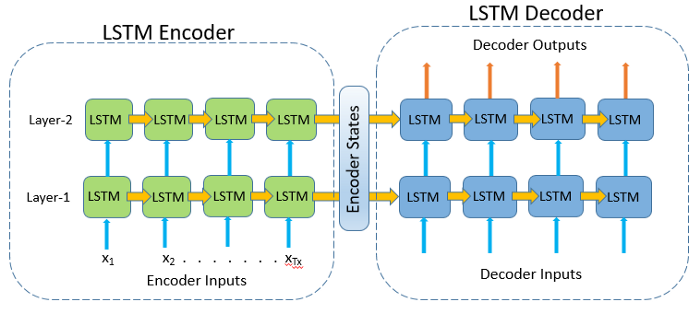

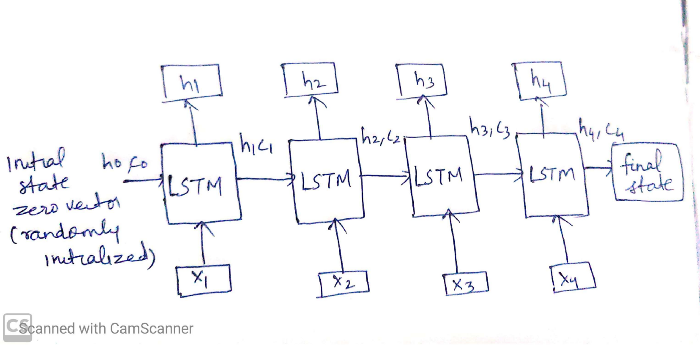

In [ ]:


def encoding_layer(rnn_size, sequence_length, num_layers, rnn_inputs, keep_prob):
    '''Create the encoding layer'''
    layer_input = rnn_inputs
    for layer in range(num_layers):
        with tf.variable_scope('encoder_{}'.format(layer)):
            cell_fw = tf.contrib.rnn.LSTMCell(rnn_size,
                                              initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))  #dimensionality of the output space(rnn_size)
            cell_fw = tf.contrib.rnn.DropoutWrapper(cell_fw, 
                                                    input_keep_prob = keep_prob)

            cell_bw = tf.contrib.rnn.LSTMCell(rnn_size,
                                              initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            cell_bw = tf.contrib.rnn.DropoutWrapper(cell_bw, 
                                                    input_keep_prob = keep_prob)

            enc_output, enc_state = tf.nn.bidirectional_dynamic_rnn(cell_fw, 
                                                                    cell_bw, 
                                                                    layer_input,
                                                                    sequence_length,
                                                                    dtype=tf.float32)
            layer_input = tf.concat(enc_output, 2)
    # Join outputs since we are using a bidirectional RNN
    enc_output = tf.concat(enc_output,2)
    return enc_output, enc_state

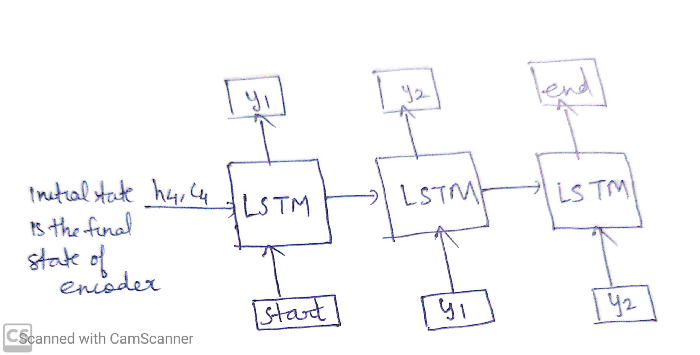

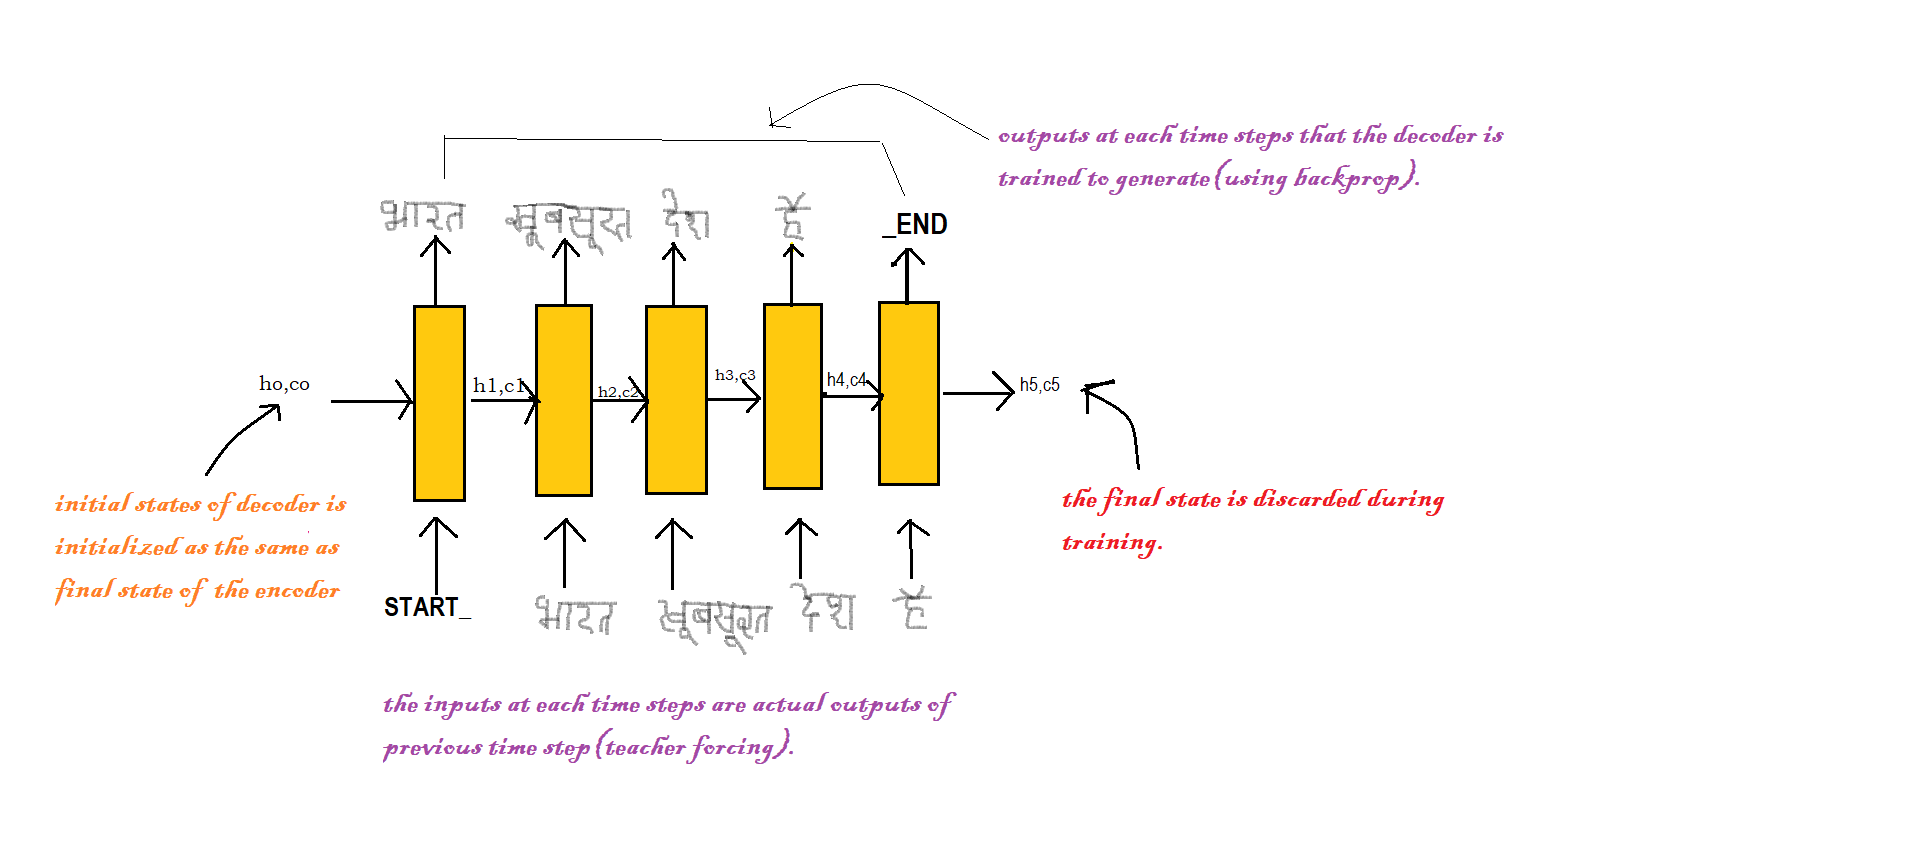

In [ ]:

def training_decoding_layer(dec_embed_input, summary_length, dec_cell, initial_state, output_layer, 
                            vocab_size, max_summary_length):
    '''Create the training logits'''
    
    training_helper = tf.contrib.seq2seq.TrainingHelper(inputs=dec_embed_input,
                                                        sequence_length=summary_length,
                                                        time_major=False)          # Helps in teacher forcing mechanism

    training_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                       training_helper,
                                                       initial_state,
                                                       output_layer) 

    training_probs, _ = tf.contrib.seq2seq.dynamic_decode(training_decoder,
                                                           output_time_major=False,
                                                           impute_finished=True,
                                                           maximum_iterations=max_summary_length)
    return training_probs

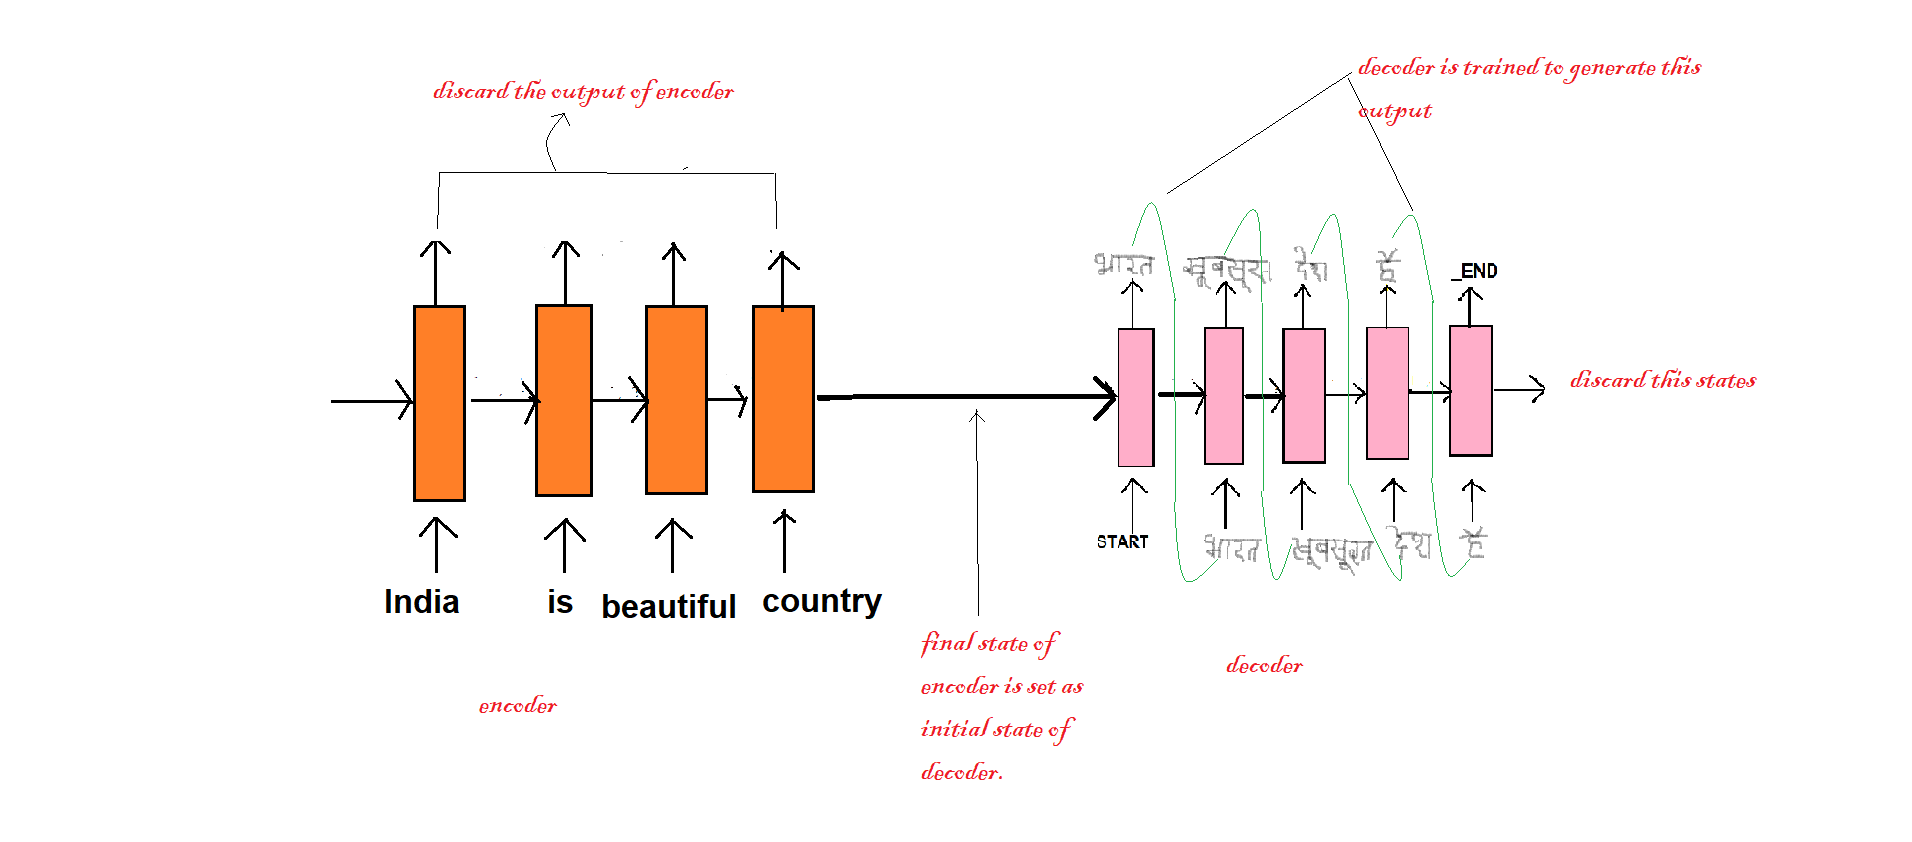

In [ ]:

def inference_decoding_layer(embeddings, start_token, end_token, dec_cell, initial_state, output_layer,
                             max_summary_length, batch_size):
    '''Create the inference logits'''
    
    start_tokens = tf.tile(tf.constant([start_token], dtype=tf.int32), [batch_size], name='start_tokens')
    
    inference_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(embeddings,
                                                                start_tokens,
                                                                end_token)      # For picking the word in softmax probability using greedy search.
                
    inference_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                        inference_helper,
                                                        initial_state,
                                                        output_layer)
                
    inference_probs, _ = tf.contrib.seq2seq.dynamic_decode(inference_decoder,
                                                            output_time_major=False,
                                                            impute_finished=True,
                                                            maximum_iterations=max_summary_length)
    
    return inference_probs

In [ ]:


def decoding_layer(dec_embed_input, embeddings, enc_output, enc_state, vocab_size, inputs_length, targets_length, 
                   max_target_length, rnn_size, vocab_to_int, keep_prob, batch_size, num_layers):
    '''create the decoding cell and attention for the training and inference decoding layers'''
    
    with tf.name_scope("RNN_Decoder_Cell"):                                                                 #adds scope to all operations
        for layer in range(num_layers):                                                                     #num of layers of LSTM
            with tf.variable_scope('decoder_{}'.format(layer)):
                lstm = tf.contrib.rnn.LSTMCell(rnn_size)
                dec_cell = tf.contrib.rnn.DropoutWrapper(lstm, 
                                                         input_keep_prob = keep_prob)
    
    output_layer = Dense(vocab_size,
                         kernel_initializer = tf.truncated_normal_initializer(mean = 0.0, stddev=0.1))
    
    attn_mech = tf.contrib.seq2seq.BahdanauAttention(rnn_size,
                                                  enc_output,
                                                  inputs_length,
                                                  normalize=False,
                                                  name='BahdanauAttention')
    
    with tf.name_scope("Attention_Wrapper"):
        dec_cell = tf.contrib.seq2seq.AttentionWrapper(dec_cell,
                                                              attn_mech,
                                                              rnn_size)          #wrap attention over decoder
    
    initial_state =  dec_cell.zero_state(batch_size=batch_size,dtype=tf.float32).clone(cell_state=enc_state[0])
#     initial_state = tf.contrib.seq2seq.DynamicAttentionWrapperState(enc_state,
#                                                                     _zero_state_tensors(rnn_size, 
#                                                                                         batch_size, 
#                                                                                         tf.float32))

    with tf.variable_scope("decode"):
#         training_logits = training_decoding_layer(dec_embed_input, 
#                                                   targets_length, 
#                                                   dec_cell,
#                                                   initial_state,
#                                                   output_layer,
#                                                   vocab_size, 
#                                                   max_target_length)
        training_helper = tf.contrib.seq2seq.TrainingHelper(inputs=dec_embed_input,
                                                            sequence_length=targets_length,
                                                            time_major=False)
        training_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                           training_helper,
                                                           initial_state,
                                                           output_layer) 
        training_logits, _ ,_ = tf.contrib.seq2seq.dynamic_decode(training_decoder,
                                            output_time_major=False,
                                            impute_finished=True,
                                            maximum_iterations=max_target_length)
        
    with tf.variable_scope("decode", reuse=True):
        start_tokens = tf.tile(tf.constant([vocab_to_int['<GO>']], dtype=tf.int32), [batch_size], name='start_tokens')
        end_token = (tf.constant(vocab_to_int['<EOS>'], dtype=tf.int32))
        inference_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(embeddings,
                                                                    start_tokens,
                                                                    end_token)
        inference_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                            inference_helper,
                                                            initial_state,
                                                            output_layer)
        inference_probs, _ ,_ = tf.contrib.seq2seq.dynamic_decode(inference_decoder,
                                            output_time_major=False,
                                            impute_finished=True,
                                            maximum_iterations=max_target_length)

    return training_probs, inference_probs

In [ ]:

def seq2seq_model(input_data, target_data, keep_prob, text_length, summary_length, max_summary_length, 
                  vocab_size, rnn_size, num_layers, vocab_to_int, batch_size):
    '''Use the previous functions to create the training and inference logits'''
    
    
    embeddings = word_embedding_matrix
    
    enc_embed_input = tf.nn.embedding_lookup(embeddings, input_data)
    enc_output, enc_state = encoding_layer(rnn_size, text_length, num_layers, enc_embed_input, keep_prob)
    
    dec_input = process_encoding_input(target_data, vocab_to_int, batch_size)
    dec_embed_input = tf.nn.embedding_lookup(embeddings, dec_input)
    
    training_probs, inference_probs  = decoding_layer(dec_embed_input, 
                                                        embeddings,
                                                        enc_output,
                                                        enc_state, 
                                                        vocab_size, 
                                                        text_length, 
                                                        summary_length, 
                                                        max_summary_length,
                                                        rnn_size, 
                                                        vocab_to_int, 
                                                        keep_prob, 
                                                        batch_size,
                                                        num_layers)
    
    return training_probs, inference_probs

In [ ]:

def pad_text_batch(text_batch):
    #Pad text with <PAD> so that each text of a batch has the same length
    max_text = max([len(text) for text in text_batch])
    return [text + [vocab_to_int['<PAD>']] * (max_text - len(text)) for text in text_batch]

In [ ]:
def get_batches(summaries, texts, batch_size):
    """batch summaries, texts, (these are integer encoded texts and summaries) and the lengths of their text together"""
    for batch_i in range(0, len(texts)//batch_size):
        start_i = batch_i * batch_size
        summaries_batch = summaries[start_i:start_i + batch_size]
        texts_batch = texts[start_i:start_i + batch_size]
        pad_summaries_batch = np.array(pad_text_batch(summaries_batch))
        pad_texts_batch = np.array(pad_text_batch(texts_batch))
        
        


        pad_summaries_lengths = []
        for summary in pad_summaries_batch:
            pad_summaries_lengths.append(len(summary))



        
        pad_texts_lengths = []
        for text in pad_texts_batch:
            pad_texts_lengths.append(len(text))
        
        yield pad_summaries_batch, pad_texts_batch, pad_summaries_lengths, pad_texts_lengths

In [ ]:
# Set the Hyperparameters
epochs = 100
batch_size = 64
rnn_size = 256
num_layers = 2
learning_rate = 0.005
keep_probability = 0.75    #  25% of dropout.

In [ ]:
from tensorflow.python.layers.core import Dense
#from tensorflow.python.ops.rnn_cell_impl import _zero_state_tensors
print('TensorFlow Version: {}'.format(tf.__version__))

TensorFlow Version: 1.14.0


In [ ]:
train_graph = tf.Graph()
# set the graph to default to ensure that it is ready for training

with train_graph.as_default():
    
    # Load the model inputs    
    input_data, targets, lr, keep_prob, summary_length, max_summary_length, text_length = model_inputs()

    # Create the training and inference logits
    training_logits, inference_logits = seq2seq_model(tf.reverse(input_data, [-1]),
                                                      targets, 
                                                      keep_prob,   
                                                      text_length,
                                                      summary_length,
                                                      max_summary_length,
                                                      len(vocab_to_int)+1,
                                                      rnn_size, 
                                                      num_layers, 
                                                      vocab_to_int,
                                                      batch_size)
    
    # Create tensors for the training logits and inference logits
    training_logits = tf.identity(training_logits.rnn_output, 'logits')
    inference_logits = tf.identity(inference_logits.sample_id, name='predictions')
    
    # Create the weights for sequence_loss
    masks = tf.sequence_mask(summary_length, max_summary_length, dtype=tf.float32, name='masks')

    with tf.name_scope("optimization"):
        # Loss function
        cost = tf.contrib.seq2seq.sequence_loss(
            training_logits,
            targets,
            masks)

        # Optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate)  #combination of RMSProp and Adagrad

        # Gradient Clipping
        #Gradient clipping is a technique to prevent exploding gradients in very deep networks, usually in recurrent neural networks
        #This prevents any gradient to have norm greater than the threshold and thus the gradients are clipped.
        
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -5., 5.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)
print("Graph is built.")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argumen

Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems

In [ ]:
# Subset the data for training
start = 0
end = start + 50000
sorted_summaries_short = sorted_summaries[start:end]
sorted_texts_short = sorted_texts[start:end]
print("The shortest text length:", len(sorted_texts_short[0]))
print("The longest text length:",len(sorted_texts_short[-1]))

The shortest text length: 26
The longest text length: 63


In [ ]:
learning_rate_decay = 0.95
min_learning_rate = 0.0005
display_step = 20                   # Check training loss after every 20 batches...total 781 batches 
stop_early = 0 
stop = 3                           # If the update loss does not decrease in 3 consecutive update checks, stop training
per_epoch = 3                      # Make 3 update checks per epoch
update_check = (len(sorted_texts_short)//batch_size//per_epoch)-1   #781//3

update_loss = 0 
batch_loss = 0
summary_update_loss = []                      # Record the update losses for saving improvements in the model

checkpoint = "drive/My Drive/savedrive10.ckpt" 
with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    # If we want to continue training a previous session
    #loader = tf.train.import_meta_graph("./" + checkpoint + '.meta')
    #loader.restore(sess, checkpoint)
    
    for epoch_i in range(1, epochs+1):
        update_loss = 0
        batch_loss = 0
        for batch_i, (summaries_batch, texts_batch, summaries_lengths, texts_lengths) in enumerate(
                get_batches(sorted_summaries_short, sorted_texts_short, batch_size)):
            start_time = time.time()
            _, loss = sess.run(
                [train_op, cost],
                {input_data: texts_batch,
                 targets: summaries_batch,
                 lr: learning_rate,
                 summary_length: summaries_lengths,
                 text_length: texts_lengths,
                 keep_prob: keep_probability})

            batch_loss += loss
            update_loss += loss
            end_time = time.time()
            batch_time = end_time - start_time

            if batch_i % display_step == 0 and batch_i > 0:
                print('Epoch {:>3}/{} Batch {:>4}/{} - Loss: {:>6.3f}, Seconds: {:>4.2f}'
                      .format(epoch_i,
                              epochs, 
                              batch_i, 
                              len(sorted_texts_short) // batch_size, 
                              batch_loss / display_step, 
                              batch_time*display_step))
                batch_loss = 0

            if batch_i % update_check == 0 and batch_i > 0:
                print("Average loss for this update:", round(update_loss/update_check,3))
                summary_update_loss.append(update_loss)
                
                # if the update loss is at a new minimum, save the model
                if update_loss <= min(summary_update_loss):
                    print('New Record!') 
                    stop_early = 0
                    saver = tf.train.Saver() 
                    saver.save(sess, checkpoint)

                else:
                    print("No Improvement.")
                    stop_early += 1
                    if stop_early == stop:
                        break
                update_loss = 0
            
                    
        # reduce learning rate, but not below its minimum value
        learning_rate *= learning_rate_decay
        if learning_rate < min_learning_rate:
            learning_rate = min_learning_rate
        
        if stop_early == stop:
            print("Stopping Training.")
            break

KeyboardInterrupt: ignored

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated


The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.


**The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.**

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters

In [ ]:

def text_to_seq(text):
    '''Prepare the text for the model'''
    
    text = clean_text(text)
    return [vocab_to_int.get(word, vocab_to_int['<UNK>']) for word in text.split()]

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

## **BLEU, or the Bilingual Evaluation Understudy, is a score for comparing a candidate translation of text to one or more reference translations.**

Although developed for translation, it can be used to evaluate text generated for a suite of natural language processing tasks.

In [ ]:
import time
t=time.time()

random = np.random.randint(50001,len(clean_texts))
input_sentence = clean_texts[random]
k=news.iloc[random:random+1,1].values
j=news.iloc[random:random+1,0].values
orig=clean_summaries[random]
text = text_to_seq(clean_texts[random])

checkpoint = "drive/My Drive/savedrive4.ckpt"

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load saved model
    loader = tf.train.import_meta_graph(checkpoint + '.meta')
    loader.restore(sess, checkpoint)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('predictions:0')
    text_length = loaded_graph.get_tensor_by_name('text_length:0')
    summary_length = loaded_graph.get_tensor_by_name('summary_length:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    
    #Multiply by batch_size to match the model's input parameters
    answer_logits = sess.run(logits, {input_data: [text]*batch_size, 
                                      summary_length: [np.random.randint(8,11)], 
                                      text_length: [len(text)]*batch_size,
                                      keep_prob: 1.0})[0]                  #No dropout required during prediction.

# Remove the padding from the text
pad = vocab_to_int["<PAD>"]
print(k)
print(j)
t1=time.time()
print(t1-t)
# print('Original Text:', input_sentence)
# print('Original summary:', clean_summaries[random])

print('\nText')
print('  Word Ids:    {}'.format([i for i in text]))
print('  Input Words: {}'.format(" ".join([int_to_vocab[i] for i in text])))

print('\nSummary')
print('  Word Ids:       {}'.format([i for i in answer_logits if i != pad]))
print('  Response Words: {}'.format(" ".join([int_to_vocab[i] for i in answer_logits if i != pad])))
print()

print("Original Summary ::: ")
print(orig)
pred=" ".join([int_to_vocab[i] for i in answer_logits if i != pad])
ref=[orig.split(" ")]

print("BLEU score  :: ")
print(sentence_bleu(ref,pred.split()))

INFO:tensorflow:Restoring parameters from drive/My Drive/savedrive4.ckpt
['The Delhi government has reportedly sought assistance from former IPS officers to address the issue of child safety in schools in the capital. "We can also constitute a \'neighbourhood watch team\' where retired officers can visit nearby schools and recommend measures to ensure safety of students on their premises," Deputy Chief Minister Manish Sisodia said.']
['Delhi seeks help of ex-IPS officers to address child safety']
6.513772487640381

Text
  Word Ids:    [173, 789, 1090, 351, 15520, 7965, 2172, 204, 1337, 4075, 595, 55, 9115, 173, 2462, 137, 1586, 3838, 50, 98, 50, 173, 31044, 105, 158, 747, 7211, 114, 13003, 1187, 1180, 6813, 928, 595, 158, 586, 7629, 98, 455, 11496, 11131, 55, 5990, 3838, 137, 2080, 146, 46, 10991, 4851, 425, 171, 8359, 7497, 30839]
  Input Words: the delhi government has reportedly sought assistance from former ips officers to address the issue of child safety in schools in the capital

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
!pip install sumy

In [ ]:
import sumy
#from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

# **Results**





In [ ]:
total=0
for i in range(100):
    random = np.random.randint(50000,len(clean_texts))
    input_sentence = clean_texts[random]
    k=reviews.iloc[random:random+1,1].values
    j=reviews.iloc[random:random+1,0].values
    orig=clean_summaries[random]
    text = text_to_seq(clean_texts[random])

    checkpoint = "drive/My Drive/savedrive.ckpt"

    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # Load saved model
        loader = tf.train.import_meta_graph(checkpoint + '.meta')
        loader.restore(sess, checkpoint)

        input_data = loaded_graph.get_tensor_by_name('input:0')
        logits = loaded_graph.get_tensor_by_name('predictions:0')
        text_length = loaded_graph.get_tensor_by_name('text_length:0')
        summary_length = loaded_graph.get_tensor_by_name('summary_length:0')
        keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        
        #Multiply by batch_size to match the model's input parameters
        answer_logits = sess.run(logits, {input_data: [text]*batch_size, 
                                          summary_length: [np.random.randint(5,8)], 
                                          text_length: [len(text)]*batch_size,
                                          keep_prob: 1.0})[0]                  #No dropout required during prediction.

    # Remove the padding from the text
    pad = vocab_to_int["<PAD>"]
    #print(k)
    print(j)
    #print(random)
    # print('Original Text:', input_sentence)

    # print('\nText')
    # print('  Word Ids:    {}'.format([i for i in text]))
    # print('  Input Words: {}'.format(" ".join([int_to_vocab[i] for i in text])))

    print('\nSummary')
    # print('  Word Ids:       {}'.format([i for i in answer_logits if i != pad]))
    print('  Response Words: {}'.format(" ".join([int_to_vocab[i] for i in answer_logits if i != pad])))
    print()
    #print("Original Summary ::: ")
    #print(orig)

    parser = PlaintextParser.from_string(text, Tokenizer("english"))




    pred=" ".join([int_to_vocab[i] for i in answer_logits if i != pad])
    ref=[orig.split(" ")]

    print()

    print("BLEU score  :: ")
    k=sentence_bleu(ref,pred.split())
    print(k)
    total+=k
print(total/100)

In [ ]:
!pip install sumy